In [3]:
import pandas as pd
#Starting Values
'''
Drought Code (DC):  378.21136474609375
Duff Moisture Code (DMC):  117.234375
Fine Fuel Moisture Code (FFMC):  80.76947021484375

Factors FFMC:
hourly.temperature_2m
hourly.relative_humidity_2m
hourly.wind_speed_10m
hourly.rain


Factors DMC:
hourly.temperature_2m
hourly.relative_humidity_2m
hourly.rain

Factors DC:
hourly.temperature_2m
hourly.rain

'''

#Incendio Ocorreu 2022-07-05T18:00

dmet = pd.read_csv('outputTHREE.csv')

In [40]:
import FWI

#print(dmet.head())
start_index = 12 + 1 # O FWI é calculado a partir das 12h
MONTH = 6
LAT = 40.1394270001517
FFMCPrev = 80.76947021484375
DMCPrev = 117.234375
DCPrev = 378.21136474609375



hora = dmet.iloc[start_index]['hourly.time']
print(hora)
TEMP = dmet.iloc[start_index]['hourly.temperature_2m']
RH = dmet.iloc[start_index]['hourly.relative_humidity_2m']
WIND = dmet.iloc[start_index]['hourly.wind_speed_10m']
RAIN = dmet.iloc[start_index]['hourly.rain']

ffmc = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
dmc = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,MONTH)
dc = FWI.DC(TEMP,RAIN,DCPrev,LAT,MONTH)
isi = FWI.ISI(WIND, ffmc)
bui = FWI.BUI(dmc,dc)
fwix = FWI.FWI(isi, bui)

print(fwix)
print(ffmc, dmc, dc, isi, bui, fwix)





2022-06-20T13:00
29.670927655184332
86.86869304939063 120.212439992 385.05336474609373 7.61483031565119 135.03282785659576 29.670927655184332


In [42]:
start_index = 14 + 1 # O FWI é calculado a partir das 12h
MONTH = 6
LAT = 40.1394270001517
FFMCPrev = 88.30044121172442 
DMCPrev = 123.34872785
DCPrev = 392.02136474609375



hora = dmet.iloc[start_index]['hourly.time']
print(hora)
TEMP = dmet.iloc[start_index]['hourly.temperature_2m']
RH = dmet.iloc[start_index]['hourly.relative_humidity_2m']
WIND = dmet.iloc[start_index]['hourly.wind_speed_10m']
RAIN = dmet.iloc[start_index]['hourly.rain']

ffmc = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
dmc = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,MONTH)
dc = FWI.DC(TEMP,RAIN,DCPrev,LAT,MONTH)
isi = FWI.ISI(WIND, ffmc)
bui = FWI.BUI(dmc,dc)
fwix = FWI.FWI(isi, bui)

print(fwix)
print(ffmc, dmc, dc, isi, bui, fwix)


2022-06-20T15:00
33.35266283189878
88.30166218850167 125.78762407400001 398.70136474609376 8.88613434602207 140.64435549558308 33.35266283189878


In [44]:
import FWI

start_index = 12 + 1 # O FWI é calculado a partir das 12h
MONTH = 6
LAT = 40.1394270001517
FFMCPrev = 80.76947021484375
DMCPrev = 117.234375
DCPrev = 378.21136474609375

# Assuming dmet is a pandas DataFrame
fwix_values = [None] * len(dmet)

for i in range(start_index, len(dmet)):
    TEMP = dmet.iloc[i]['hourly.temperature_2m']
    RH = dmet.iloc[i]['hourly.relative_humidity_2m']
    WIND = dmet.iloc[i]['hourly.wind_speed_10m']
    RAIN = dmet.iloc[i]['hourly.rain']

    FFMCPrev = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
    DMCPrev = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,MONTH)
    DCPrev = FWI.DC(TEMP,RAIN,DCPrev,LAT,MONTH)
    isi = FWI.ISI(WIND, FFMCPrev)
    bui = FWI.BUI(DMCPrev,DCPrev)
    fwix = FWI.FWI(isi, bui)

    fwix_values[i] = fwix

# Add the fwix_values list as a new column to the DataFrame
dmet['fwix'] = fwix_values

# Remove rows where fwix is NaN
dmet = dmet.dropna(subset=['fwix'])

dmet.to_csv('outputWithFWIbyHour.csv', index=False)

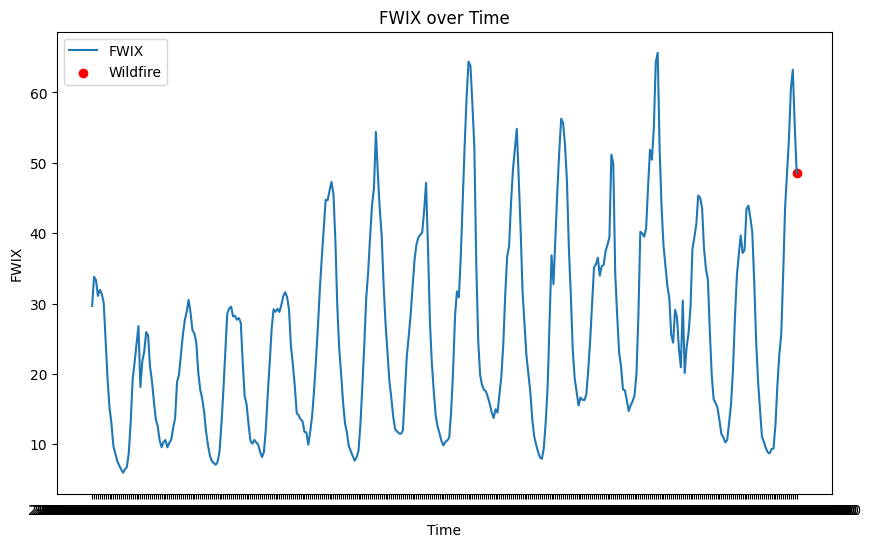

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

dmet = pd.read_csv('outputWithFWIbyHour.csv')

plt.figure(figsize=(10,6))
plt.plot(dmet['hourly.time'], dmet['fwix'], label='FWIX')
plt.scatter(dmet['hourly.time'].iloc[-1], dmet['fwix'].iloc[-1], color='red', label='Wildfire')
plt.xlabel('Time')
plt.ylabel('FWIX')
plt.title('FWIX over Time')
plt.legend()
plt.savefig('fwix_byHour.png', dpi=300)
plt.show()